# Fichier test T4gpd

## 1. Premier Test avec les instructions de base

In [1]:
from datetime import datetime, timedelta
from t4gpd.commons.DatetimeLib import DatetimeLib
from t4gpd.demos.GeoDataFrameDemos import GeoDataFrameDemos
from t4gpd.sun.STHardShadow import STHardShadow

buildings = GeoDataFrameDemos.ensaNantesBuildings()

datetimes = [datetime(2020, 7, 21, 9), datetime(2020, 7, 21, 15), timedelta(hours=3)]
datetimes = DatetimeLib.generate(datetimes)
shadows = STHardShadow(buildings, datetimes, occludersElevationFieldname='HAUTEUR',
    altitudeOfShadowPlane=0, aggregate=True, tz=None, model='pysolar').run()

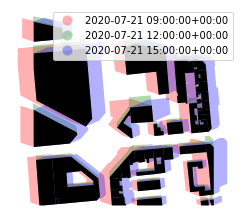

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

my_cmap = ListedColormap(['red', 'green', 'blue'])

_, basemap = plt.subplots(figsize=(0.5 * 8.26, 0.5 * 8.26))
shadows.plot(ax=basemap, column='datetime', cmap=my_cmap, alpha=0.3, legend=True)
buildings.plot(ax=basemap, color='black')
plt.axis('off')
plt.show()

## 2. Test avec l'import de nos données :

### 2.1 Import des données batiments et arbres 

In [1]:
from import_data import *
path_arbre="data/arbre_villeurbanne.json"
path_buildings="data/building_first_100.json"

In [2]:
arb, bati=path_to_gdf(path_arbre=path_arbre, path_building=path_buildings)

In [3]:
arb.head()

,index,hauteur,rayon,geometry
0,0,0,0.0,POINT (845359.943 6522315.618)
1,1,13,4.0,POINT (845278.924 6521633.532)
2,2,9,3.0,POINT (844457.880 6521405.529)
3,3,14,2.5,POINT (845131.459 6521200.974)
4,4,17,6.0,POINT (844928.974 6521661.839)


In [4]:
bati.head()

,index,hauteur,geometry
0,0,3.4,"POLYGON Z ((855159.722 6513444.392 221.537, 85..."
1,1,2.5,"POLYGON Z ((854945.566 6514323.736 218.425, 85..."
2,2,2.5,"POLYGON Z ((854943.451 6514324.722 218.425, 85..."
3,3,5.3,"POLYGON Z ((854979.496 6514247.819 218.720, 85..."
4,4,9.6,"POLYGON Z ((852354.118 6514406.654 213.114, 85..."


### 2.2 Test de l'affichage de l'ombre

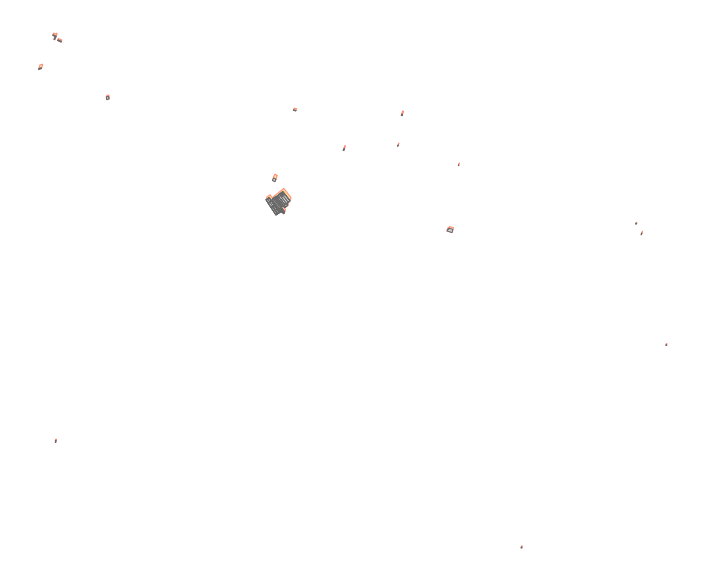

In [7]:
from ombres import *
date=datetime(2022,1,7,13)
ombre=calcul_ombre(date, bati=bati)

mapping(bati,ombre)

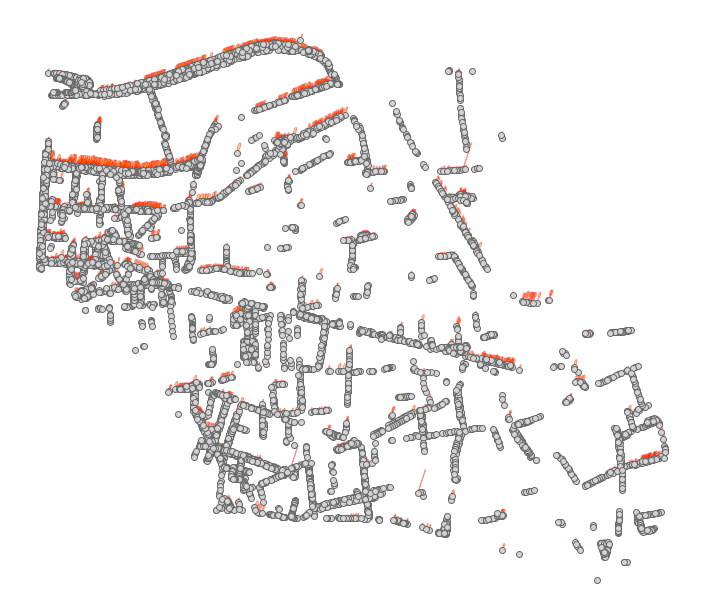

In [8]:
ombre=calcul_ombre(date, arb=arb)
mapping(arb,ombre)